In [1]:
import pandas as pd
import numpy as np
import networkx as nx

In [2]:
#Delete the stocks with incomplete data

def sum_of_ascii(s):
    return sum(ord(char) for char in str(s))
file_path = 'stockData.csv'  
stock_data = pd.read_csv(file_path)
filtered_stock_data = stock_data[stock_data['code'].apply(sum_of_ascii) != 24]
print(filtered_stock_data)

       Unnamed: 0        date       code     open     high      low    close  \
0               1  2021-01-29  sh.600519  1999.98  2187.00  1982.46  2116.18   
1               2  2021-02-26  sh.600519  2130.00  2627.88  2067.30  2122.78   
2               3  2021-03-31  sh.600519  2179.00  2180.00  1900.18  2009.00   
3               4  2021-04-30  sh.600519  2021.00  2165.00  1990.00  2006.78   
4               5  2021-05-31  sh.600519  2000.00  2320.00  1866.01  2218.00   
...           ...         ...        ...      ...      ...      ...      ...   
11471          20  2022-08-31  sh.601990     7.96     9.34     7.47     8.52   
11472          21  2022-09-30  sh.601990     8.45     9.30     7.61     7.63   
11473          22  2022-10-31  sh.601990     7.60     8.49     7.50     7.92   
11474          23  2022-11-30  sh.601990     7.95     8.80     7.92     8.53   
11475          24  2022-12-30  sh.601990     8.63     8.80     7.80     7.93   

             volume        amount  adju

In [3]:
# #取出特定列
# stock_df = filtered_stock_data
# stock_df_pivot = stock_df[["date","code",'return']]
# stock_df_pivot

In [4]:
# stock_df_pivot = stock_df_pivot.pivot('date','code','return').reset_index()
# stock_df_pivot

In [5]:
import matplotlib.pyplot as plt
# stock_df_pivot = stock_df_pivot.dropna(axis = 1)
# stock_df_pivot

In [6]:
# corr_df = stock_df_pivot.corr(method='pearson')
# corr_df

In [7]:
# import numpy as np
# import networkx as nx
# stocks = corr_df.index.values
# cor_matrix = np.asmatrix(corr_df)
# G = nx.from_numpy_matrix(cor_matrix)
# G = nx.relabel_nodes(G,lambda x: stocks[x])
# nx.write_graphml(G, "test.graphml")
# nx.write_gexf(G, 'stocks.gexf')

In [8]:
import baostock as bs
import pandas as pd

lg = bs.login()
print('login respond error_code:' + lg.error_code)
print('login respond error_msg:' + lg.error_msg)

rs = bs.query_stock_industry()
print('query_stock_industry error_code:' + rs.error_code)
print('query_stock_industry respond error_msg:' + rs.error_msg)

industry_list = []
while (rs.error_code == '0') & rs.next():
    industry_list.append(rs.get_row_data())
industry_df = pd.DataFrame(industry_list, columns=rs.fields)

industry_csv_path = "stock_industry.csv"
industry_df.to_csv(industry_csv_path, encoding="utf-8", index=False)
print(industry_df)
stock_data = filtered_stock_data

merged_df = pd.merge(stock_data, industry_df, on='code', how='left')
print(merged_df.head())

merged_csv_path = "merged_stock_data.csv"
merged_df.to_csv(merged_csv_path, encoding="utf-8", index=False)
bs.logout()

login success!
login respond error_code:0
login respond error_msg:success
query_stock_industry error_code:0
query_stock_industry respond error_msg:success
      updateDate       code code_name industry industryClassification
0     2023-10-30  sh.600000      浦发银行       银行                 申万一级行业
1     2023-10-30  sh.600001      邯郸钢铁                          申万一级行业
2     2023-10-30  sh.600002      齐鲁石化                          申万一级行业
3     2023-10-30  sh.600003     ST东北高                          申万一级行业
4     2023-10-30  sh.600004      白云机场     交通运输                 申万一级行业
...          ...        ...       ...      ...                    ...
5300  2023-10-30  sz.301533      威马农机                          申万一级行业
5301  2023-10-30  sz.301548      崇德科技                          申万一级行业
5302  2023-10-30  sz.301550      斯菱股份                          申万一级行业
5303  2023-10-30  sz.301558      三态股份                          申万一级行业
5304  2023-10-30  sz.301559      中集环科                          申万一级行业

[530

In [9]:
#Color the network based on different industry sectors

stock_data = pd.read_csv('merged_stock_data.csv')
stock_data = stock_data.dropna(subset=['industry'])
pivot_df = stock_data.pivot(index='date', columns='code', values='return')
corr_matrix = pivot_df.corr()
print(corr_matrix)


code       sh.600000  sh.600004  sh.600009  sh.600010  sh.600011  sh.600015  \
code                                                                          
sh.600000   1.000000   0.481348   0.395146  -0.052826   0.313872   0.758400   
sh.600004   0.481348   1.000000   0.775511  -0.431587   0.372607   0.398022   
sh.600009   0.395146   0.775511   1.000000  -0.365356   0.363434   0.328022   
sh.600010  -0.052826  -0.431587  -0.365356   1.000000   0.024683  -0.270425   
sh.600011   0.313872   0.372607   0.363434   0.024683   1.000000   0.272197   
...              ...        ...        ...        ...        ...        ...   
sz.300919  -0.027021  -0.180140  -0.145118   0.156616  -0.177598   0.179322   
sz.300957   0.042844   0.131016   0.119430  -0.335471  -0.031408   0.111810   
sz.300979   0.582188   0.325986   0.224635  -0.258218   0.210204   0.390892   
sz.300999   0.310042   0.383234   0.474940  -0.228184   0.207369   0.265945   
sz.301029  -0.006045   0.016651  -0.003096   0.22978

In [10]:
corr_values = corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)]
# make 0.7 threshold 
threshold = 0.7
G = nx.Graph()
G = nx.relabel_nodes(G, {i: v for i, v in enumerate(corr_matrix.columns)})
for stock in corr_matrix.columns:
    G.add_node(stock)

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > threshold:
            G.add_edge(corr_matrix.columns[i], corr_matrix.columns[j], weight=corr_matrix.iloc[i, j])
industry_map = pd.Series(stock_data.set_index('code')['industry']).dropna()
industry_colors = pd.factorize(industry_map)[0]
industry_color_map = {node: industry_colors[industry_map.index.tolist().index(node)] if node in industry_map.index else 0 for node in G.nodes}
for node in G.nodes:
    G.nodes[node]['industry_color'] = industry_color_map[node]

nx.write_gexf(G, "network_graph_by_industry.gexf")
print("Network graph saved as 'network_graph_by_industry.gexf'")

Network graph saved as 'network_graph_by_industry.gexf'


In [11]:
#Color the network based on the ROI of each month

def assign_color(return_rate):
    if return_rate < -0.20:
        return 'blue'  # -20% 以下
    elif -0.20 <= return_rate <= 0.20:
        return 'green'  # -20% 到 20% 之间
    else:
        return 'red'  # 20% 以上

for date, row in pivot_df.iterrows():
    for code in G.nodes:
        return_rate = row.get(code, 0)
        color = assign_color(return_rate)
        G.nodes[code][date] = color

nx.write_gexf(G, "dynamic_network_graph_by_return.gexf")
print("Dynamic network graph saved as 'dynamic_network_graph_by_return.gexf'")


Dynamic network graph saved as 'dynamic_network_graph_by_return.gexf'


In [12]:
G.number_of_edges()

1225

In [13]:
G.number_of_nodes()

478

In [14]:
# Scrap the CSI 300 and Shanghai Composite index data
import baostock as bs
import pandas as pd
import matplotlib.pyplot as plt

def fetch_and_save_index_data(index_code, start_date, end_date, file_name):
    """
    Fetch historical data for a given index from baostock and save it to a CSV file.
    """
    bs.login()
    rs = bs.query_history_k_data_plus(index_code,
                                      "date,code,open,high,low,close,volume",
                                      start_date=start_date, end_date=end_date,
                                      frequency="d", adjustflag="3")
    data_list = []
    while (rs.error_code == '0') & rs.next():
        data_list.append(rs.get_row_data())
    bs.logout()
    result_df = pd.DataFrame(data_list, columns=rs.fields)
    result_df.to_csv(file_name, index=False)
    print(f"Data saved to {file_name}")    

indexes = [("sh.000001", "shanghai_index_data_2021-2022.csv"), 
           ("sh.000300", "csi300_index_data_2021-2022.csv")]
start_date = '2021-01-01'
end_date = '2022-12-31'
for index_code, file_name in indexes:
    fetch_and_save_index_data(index_code, start_date, end_date, file_name)

login success!
logout success!
Data saved to shanghai_index_data_2021-2022.csv
login success!
logout success!
Data saved to csi300_index_data_2021-2022.csv


In [15]:
shanghai_df = pd.read_csv("shanghai_index_data_2021-2022.csv", index_col = None)
shanghai_df['index'] = ['Shanghai Composite Index']*485 
shanghai_df

,date,code,open,high,low,close,volume,index
0,2021-01-04,sh.000001,3474.6793,3511.6554,3457.2061,3502.9584,38079080000,Shanghai Composite Index
1,2021-01-05,sh.000001,3492.1912,3528.6767,3484.7151,3528.6767,40799593400,Shanghai Composite Index
2,2021-01-06,sh.000001,3530.9072,3556.8022,3513.1262,3550.8767,37023092600,Shanghai Composite Index
3,2021-01-07,sh.000001,3552.9087,3576.2046,3526.6174,3576.2046,40534822600,Shanghai Composite Index
4,2021-01-08,sh.000001,3577.6923,3588.0625,3544.8912,3570.1082,34555789600,Shanghai Composite Index
...,...,...,...,...,...,...,...,...
480,2022-12-26,sh.000001,3048.1963,3071.8363,3047.3491,3065.5626,20650389300,Shanghai Composite Index
481,2022-12-27,sh.000001,3077.7469,3098.0783,3074.3133,3095.5678,22221832200,Shanghai Composite Index
482,2022-12-28,sh.000001,3088.6174,3098.6496,3079.4338,3087.3997,22455415100,Shanghai Composite Index
483,2022-12-29,sh.000001,3076.7264,3086.0048,3064.4594,3073.7016,21557067600,Shanghai Composite Index


In [16]:
CSI_df = pd.read_csv('csi300_index_data_2021-2022.csv', index_col = None)
CSI_df['index'] = ['CSI 300 Index']*485
CSI_df

,date,code,open,high,low,close,volume,index
0,2021-01-04,sh.000300,5212.9313,5284.4343,5190.9372,5267.7181,21171138200,CSI 300 Index
1,2021-01-05,sh.000300,5245.8355,5368.5049,5234.3775,5368.5049,22493115900,CSI 300 Index
2,2021-01-06,sh.000300,5386.5144,5433.4694,5341.4304,5417.6677,19377344400,CSI 300 Index
3,2021-01-07,sh.000300,5428.3944,5513.6568,5413.3526,5513.6568,21987208000,CSI 300 Index
4,2021-01-08,sh.000300,5526.2876,5547.4733,5442.6939,5495.4306,20432495600,CSI 300 Index
...,...,...,...,...,...,...,...,...
480,2022-12-26,sh.000300,3830.5682,3856.8066,3827.5186,3843.4887,7300571200,CSI 300 Index
481,2022-12-27,sh.000300,3860.9054,3891.8497,3856.5800,3887.8540,7751535000,CSI 300 Index
482,2022-12-28,sh.000300,3874.9132,3884.7205,3854.9406,3871.2644,8442465600,CSI 300 Index
483,2022-12-29,sh.000300,3854.2363,3868.2933,3838.4803,3856.7007,7939481500,CSI 300 Index


In [17]:
index_df = pd.concat([shanghai_df, CSI_df])
index_df

,date,code,open,high,low,close,volume,index
0,2021-01-04,sh.000001,3474.6793,3511.6554,3457.2061,3502.9584,38079080000,Shanghai Composite Index
1,2021-01-05,sh.000001,3492.1912,3528.6767,3484.7151,3528.6767,40799593400,Shanghai Composite Index
2,2021-01-06,sh.000001,3530.9072,3556.8022,3513.1262,3550.8767,37023092600,Shanghai Composite Index
3,2021-01-07,sh.000001,3552.9087,3576.2046,3526.6174,3576.2046,40534822600,Shanghai Composite Index
4,2021-01-08,sh.000001,3577.6923,3588.0625,3544.8912,3570.1082,34555789600,Shanghai Composite Index
...,...,...,...,...,...,...,...,...
480,2022-12-26,sh.000300,3830.5682,3856.8066,3827.5186,3843.4887,7300571200,CSI 300 Index
481,2022-12-27,sh.000300,3860.9054,3891.8497,3856.5800,3887.8540,7751535000,CSI 300 Index
482,2022-12-28,sh.000300,3874.9132,3884.7205,3854.9406,3871.2644,8442465600,CSI 300 Index
483,2022-12-29,sh.000300,3854.2363,3868.2933,3838.4803,3856.7007,7939481500,CSI 300 Index


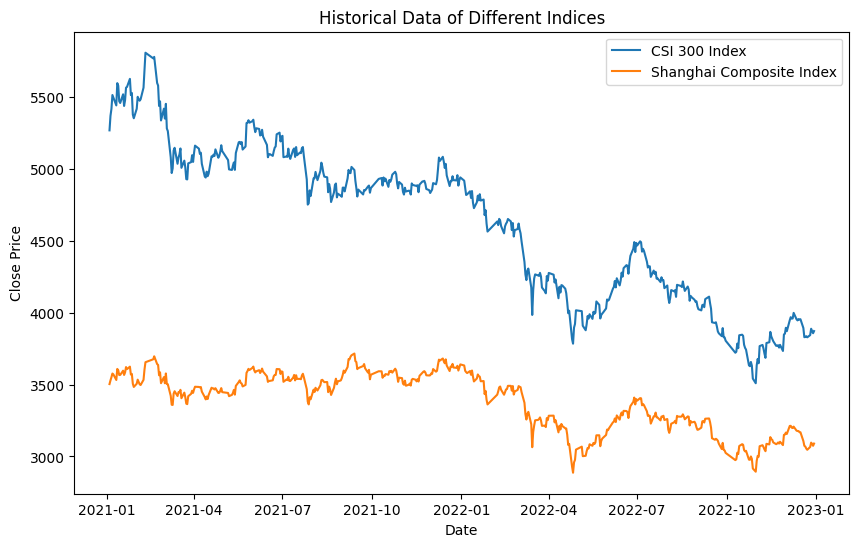

In [18]:
df = index_df
df['date'] = pd.to_datetime(df['date'])

fig, ax = plt.subplots(figsize=(10, 6))
for key, grp in df.groupby(['index']):
    ax.plot(grp['date'], grp['close'], label=key)

ax.legend()
ax.set_xlabel("Date")
ax.set_ylabel("Close Price")
ax.set_title("Historical Data of Different Indices")

fig.savefig('index_line.png')
plt.show()